In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
x = pd.read_csv('/content/drive/MyDrive/TataSteel10years.csv')
# x = pd.read_csv('TISC Historical Data.csv')

In [49]:
x.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,06/19/2024,180.00,182.26,182.48,179.35,27.46M,-0.62%
1,06/18/2024,181.12,183.80,184.60,180.60,35.03M,-1.11%
2,06/14/2024,183.15,182.95,183.50,181.40,28.51M,0.32%
3,06/13/2024,182.56,183.40,184.10,180.51,36.67M,0.18%
4,06/12/2024,182.23,182.25,183.87,181.50,33.31M,0.50%


In [50]:
reversed_x = x.iloc[::-1]

In [51]:
reversed_x.head()

,Date,Price,Open,High,Low,Vol.,Change %
2587,01/01/2014,38.21,38.13,38.29,38.01,12.53M,0.39%
2586,01/02/2014,37.61,38.22,39.07,37.41,41.99M,-1.57%
2585,01/03/2014,37.01,37.37,37.63,36.70,33.42M,-1.60%
2584,01/06/2014,36.63,36.87,37.30,36.30,28.39M,-1.03%
2583,01/07/2014,35.41,36.78,36.96,35.22,40.94M,-3.33%


In [52]:
x_sorted = reversed_x.reset_index(drop=True)

In [53]:
x_sorted.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/2014,38.21,38.13,38.29,38.01,12.53M,0.39%
1,01/02/2014,37.61,38.22,39.07,37.41,41.99M,-1.57%
2,01/03/2014,37.01,37.37,37.63,36.70,33.42M,-1.60%
3,01/06/2014,36.63,36.87,37.30,36.30,28.39M,-1.03%
4,01/07/2014,35.41,36.78,36.96,35.22,40.94M,-3.33%


In [54]:
x_sorted['Date'] = pd.to_datetime(x_sorted['Date'])


split = int(len(x_sorted)*0.7)
test = x_sorted[split:]
train = x_sorted[:split]

# test = x_sorted[x_sorted['Date'].dt.strftime('%Y').str.startswith('2024')]
# train = x_sorted[x_sorted['Date'] <= '2023-12-31']
test = test.reset_index(drop=True)
train = train.reset_index(drop=True)

In [55]:
x_sorted.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2014-01-01,38.21,38.13,38.29,38.01,12.53M,0.39%
1,2014-01-02,37.61,38.22,39.07,37.41,41.99M,-1.57%
2,2014-01-03,37.01,37.37,37.63,36.70,33.42M,-1.60%
3,2014-01-06,36.63,36.87,37.30,36.30,28.39M,-1.03%
4,2014-01-07,35.41,36.78,36.96,35.22,40.94M,-3.33%


In [56]:
train.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2014-01-01,38.21,38.13,38.29,38.01,12.53M,0.39%
1,2014-01-02,37.61,38.22,39.07,37.41,41.99M,-1.57%
2,2014-01-03,37.01,37.37,37.63,36.70,33.42M,-1.60%
3,2014-01-06,36.63,36.87,37.30,36.30,28.39M,-1.03%
4,2014-01-07,35.41,36.78,36.96,35.22,40.94M,-3.33%


In [57]:
test.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-05-04,106.39,107.44,108.67,105.75,249.62M,-0.08%
1,2021-05-05,107.01,108.40,108.83,104.70,192.50M,0.59%
2,2021-05-06,110.09,105.50,112.90,104.25,464.35M,2.87%
3,2021-05-07,118.24,113.50,119.20,113.01,540.75M,7.40%
4,2021-05-10,121.64,121.00,122.90,120.00,280.81M,2.88%


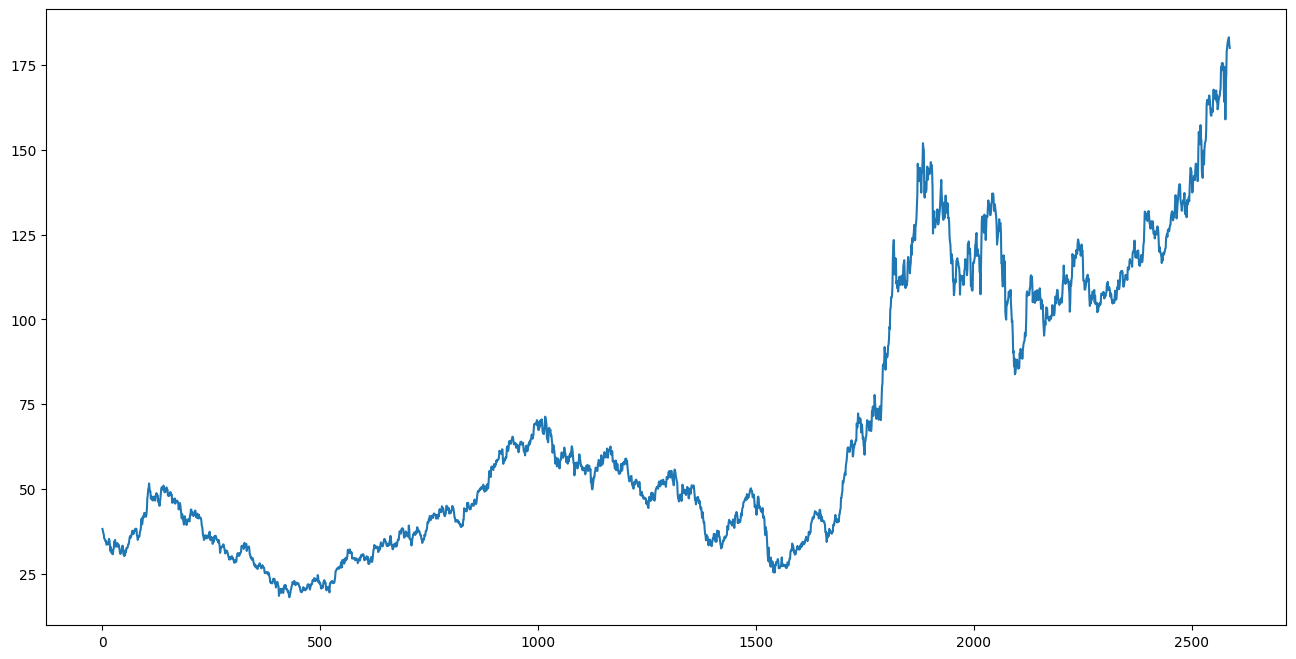

In [58]:
plt.figure(figsize=(16,8))
plt.plot(x_sorted["Price"], label="Day-wise price")

In [59]:
x.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [60]:
training_set = train.iloc[:,1:2].values

In [61]:
training_set.shape

(1811, 1)

In [62]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [63]:
training_set_scaled

array([[0.22782805],
       [0.22104072],
       [0.21425339],
       ...,
       [0.96233032],
       [0.96527149],
       [1.        ]])

In [64]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [65]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [66]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [67]:
regressor = Sequential()

regressor.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 128, return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 128, return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 128, return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 128))
regressor.add( Dropout(0.5))

regressor.add(Dense(units = 1))

In [68]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 128)           66560     
                                                                 
 dropout_5 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 128)           131584    
                                                                 
 dropout_6 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 128)           131584    
                                                                 
 dropout_7 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 128)          

In [69]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mean_absolute_error'])
history = regressor.fit(X_train, y_train, epochs = 10, batch_size = 32, verbose=1)

Epoch 1/10
55/55 [==============================] - 45s 578ms/step - loss: 0.0079 - mean_absolute_error: 0.0626
Epoch 2/10
55/55 [==============================] - 42s 768ms/step - loss: 0.0039 - mean_absolute_error: 0.0460
Epoch 3/10
55/55 [==============================] - 45s 814ms/step - loss: 0.0035 - mean_absolute_error: 0.0440
Epoch 4/10
55/55 [==============================] - 34s 605ms/step - loss: 0.0034 - mean_absolute_error: 0.0431
Epoch 5/10
55/55 [==============================] - 33s 593ms/step - loss: 0.0025 - mean_absolute_error: 0.0376
Epoch 6/10
55/55 [==============================] - 31s 573ms/step - loss: 0.0028 - mean_absolute_error: 0.0390
Epoch 7/10
55/55 [==============================] - 33s 597ms/step - loss: 0.0023 - mean_absolute_error: 0.0357
Epoch 8/10
55/55 [==============================] - 31s 568ms/step - loss: 0.0022 - mean_absolute_error: 0.0346
Epoch 9/10
55/55 [==============================] - 33s 610ms/step - loss: 0.0023 - mean_absolute_error:

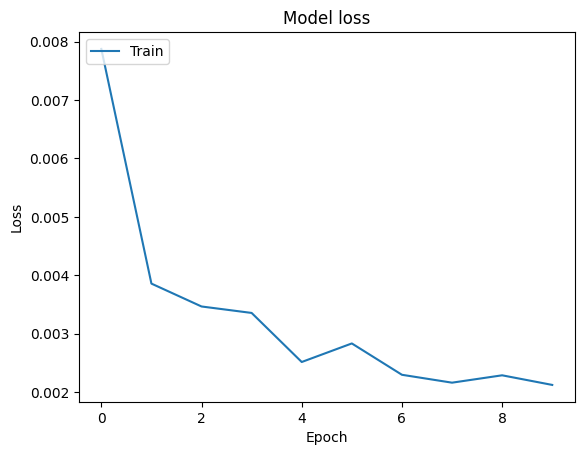

In [70]:
# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [71]:
actual_stock_price = test.iloc[:,1:2].values

In [72]:
dataset_total = pd.concat((train['Price'], test['Price']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [73]:
predicted_price = regressor.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

25/25 [==============================] - 7s 162ms/step


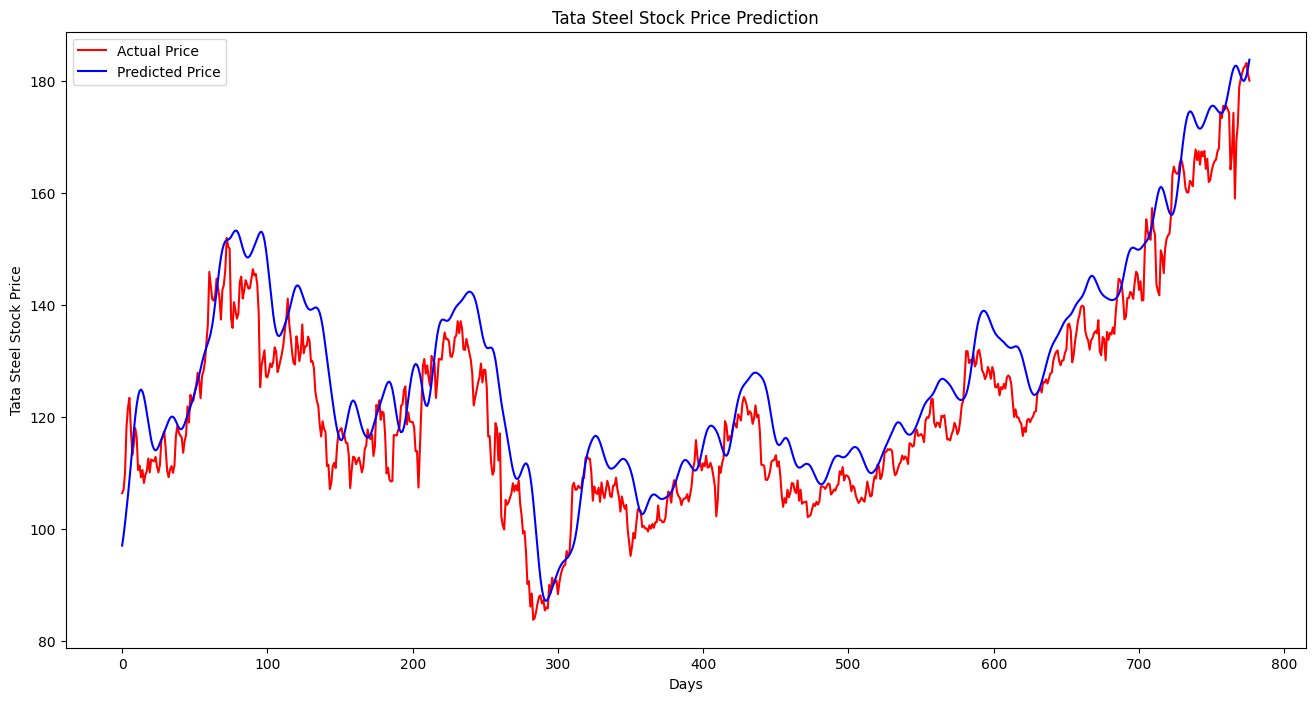

In [74]:
plt.figure(figsize=(16,8))

plt.plot(actual_stock_price, color = 'red', label = 'Actual Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Tata Steel Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Tata Steel Stock Price')
plt.legend()

plt.show()

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, median_absolute_error

mae = mean_absolute_error(actual_stock_price, predicted_price)
mse = mean_squared_error(actual_stock_price, predicted_price)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual_stock_price, predicted_price)
mda = median_absolute_error(actual_stock_price, predicted_price)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("median_absolute_error:", mda)

MAE: 6.593949650552129
MSE: 68.23134797607659
RMSE: 8.260226871949499
MAPE: 0.055319046995415296
median_absolute_error: 5.5996044921874955


In [76]:
mape = np.mean(np.abs((actual_stock_price - predicted_price) / actual_stock_price)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 5.53%


In [77]:
directional_accuracy = np.sign(actual_stock_price[1:] - actual_stock_price[:-1]) == np.sign(predicted_price[1:] - actual_stock_price[:-1])
print("Directional Accuracy:", np.mean(directional_accuracy)*100, "%")

Directional Accuracy: 55.154639175257735 %


1/1 [==============================] - 0s 120ms/step


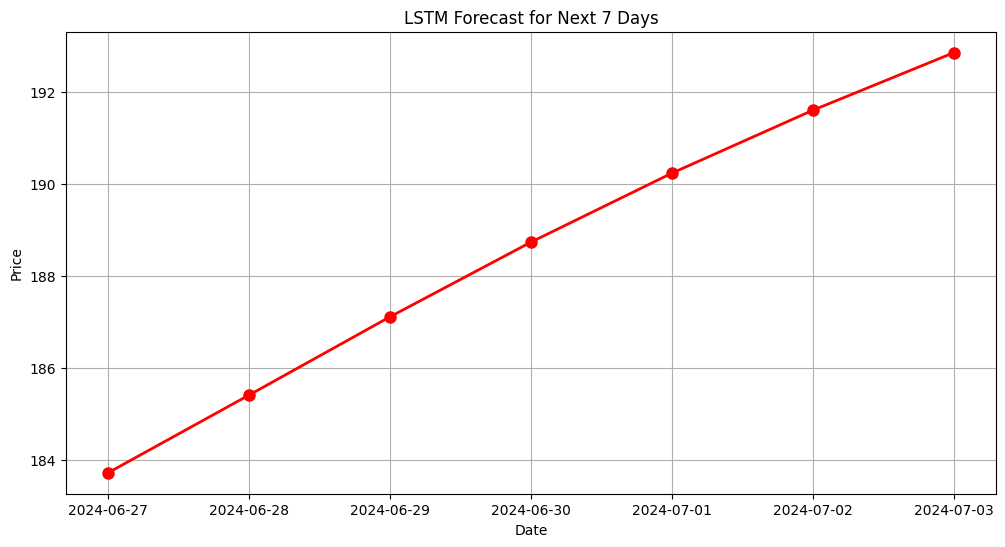

         Date  Forecasted Price
0  2024-06-27        183.722275
1  2024-06-28        185.411163
2  2024-06-29        187.112610
3  2024-06-30        188.735596
4  2024-07-01        190.235001
5  2024-07-02        191.602768
6  2024-07-03        192.854858


In [78]:
predicted_price_next_7_days = []
current_input = X_test[-1]

for i in range(7):
    pred = regressor.predict(current_input.reshape(1, 60, 1))
    predicted_price_next_7_days.append(pred[0, 0])
    current_input = np.append(current_input[1:], pred, axis=0)

predicted_price_next_7_days = np.array(predicted_price_next_7_days).reshape(-1, 1)
predicted_price_next_7_days_scaled = sc.inverse_transform(predicted_price_next_7_days)

last_date = pd.to_datetime('2024-06-26')
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

plt.figure(figsize=(12, 6))
plt.plot(forecast_index, predicted_price_next_7_days_scaled, color='red', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title('LSTM Forecast for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

forecast_df = pd.DataFrame({'Date': forecast_index.date, 'Forecasted Price': predicted_price_next_7_days_scaled.flatten()})
print(forecast_df)